In [84]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [85]:
df = pd.read_csv('/content/train.csv',usecols=[5,9,1])

In [86]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [88]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-88-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [90]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
x_train.shape

(712, 2)

/tmp/ipython-input-93-4231558789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],color='green')


<Axes: xlabel='Age', ylabel='Density'>

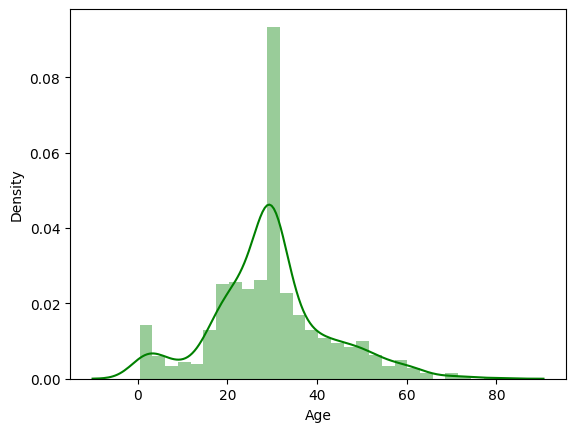

In [93]:
sns.distplot(x_train['Age'],color='green')

/tmp/ipython-input-94-3468147115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'],color='red')


<Axes: xlabel='Fare', ylabel='Density'>

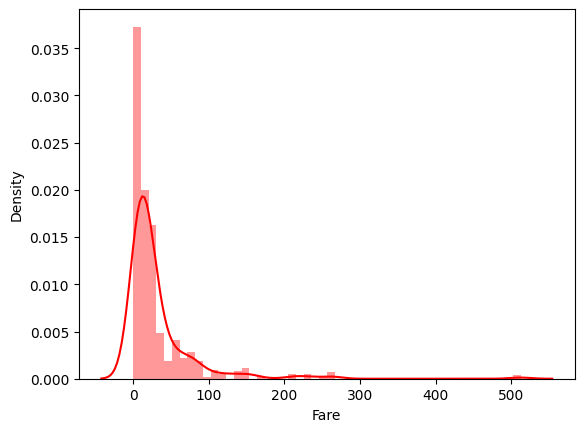

In [94]:
sns.distplot(x_train['Fare'],color='red')

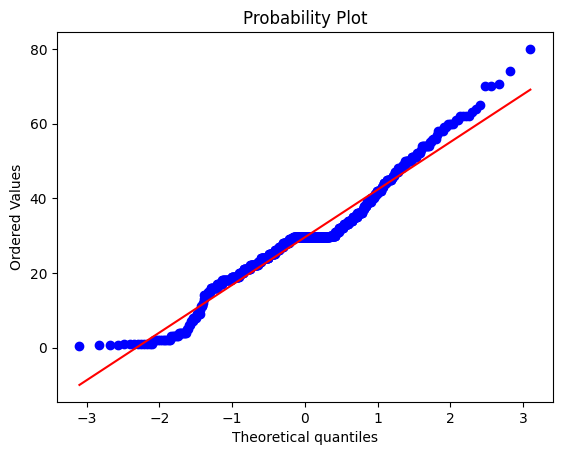

In [95]:
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.show()

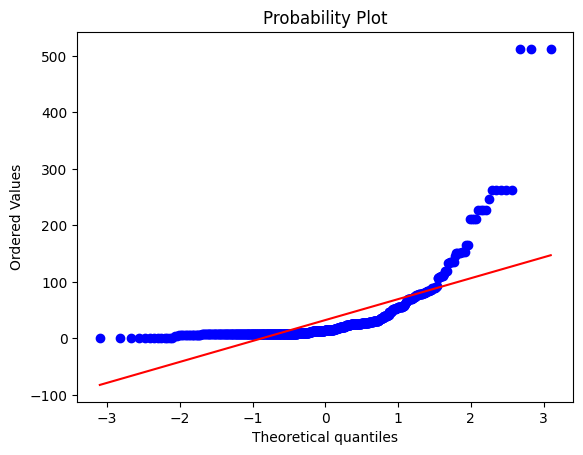

In [96]:
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.show()

In [97]:
lr = LogisticRegression()

lr.fit(x_train,y_train)



LogisticRegression()

In [98]:
y_pred = lr.predict(x_test)

In [99]:
accuracy_score(y_pred,y_test)*100

64.80446927374301

In [121]:
print(cross_val_score(lr,x_train,y_train,scoring='accuracy',cv=10).mean()*100)

65.57902973395932


In [100]:
ft = FunctionTransformer(func=np.log1p)

x_train_transformed = ft.fit_transform(x_train)
x_test_transformed = ft.transform(x_test)

In [101]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed,columns=x_test.columns)

/tmp/ipython-input-102-1244956053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Age'],color='green')


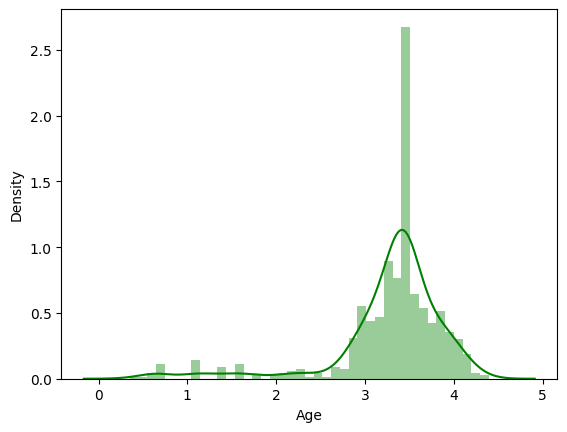

In [102]:
sns.distplot(x_train_transformed['Age'],color='green')
plt.show()

/tmp/ipython-input-103-976188103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Fare'],color='red')


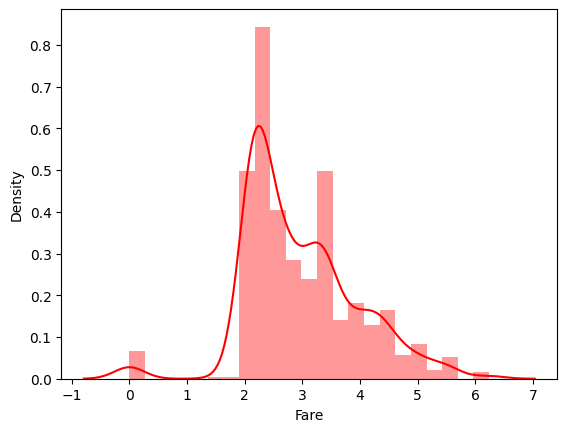

In [103]:
sns.distplot(x_train_transformed['Fare'],color='red')
plt.show()

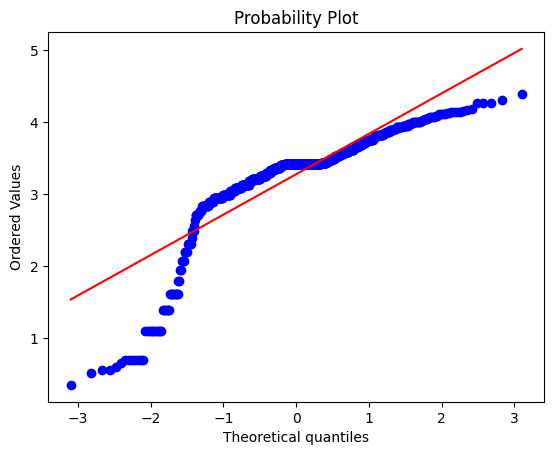

In [104]:
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.show()

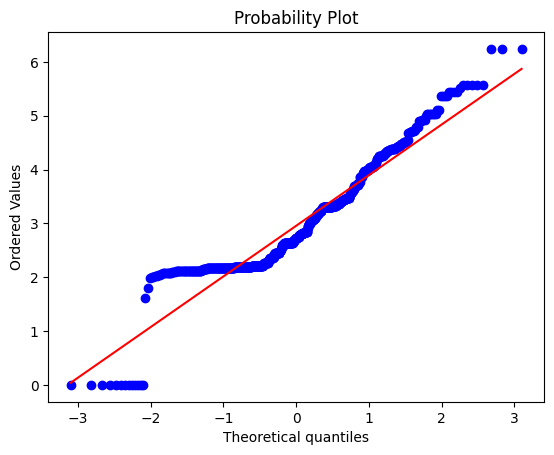

In [105]:
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.show()

In [109]:
lr1 = LogisticRegression()

lr1.fit(x_train_transformed,y_train)

y_predict1 = lr.predict(x_test_transformed)

In [111]:
accuracy_score(y_predict1,y_test)

0.5865921787709497

In [120]:
print(cross_val_score(lr1,x_train_transformed,y_train,scoring='accuracy',cv=10).mean()*100)

67.83646322378716
